# Field of Study vs. Occupation
Adam Ben-Aamr

12-10-2024

# Data Introduction
Many individuals enter college or university with an idea of what they want to focus their career on. However, there are many instances where these same individuals end up changeing their choice of career. I have always been curious about the factors that influence career changes. I want to explore how someone's field of study impacts their likelihood to stick with or switch their careers. According to the distributor and maintainer, this dataset is designed to help explore and predict whether individuals are likely to change their occupation based on their academic background, job experience, and other demographic factors.

It is unknown where this data origniated from and everything is completely annonymous. This could be a potential bias as it could provide the opporunity of eliminating some subset of bias. The csv file used for analysis in this project was retrieved from [Kaggle](https://www.kaggle.com/datasets/jahnavipaliwal/field-of-study-vs-occupation) uploaded by the user [Jahnavi Paliwal](https://www.kaggle.com/jahnavipaliwal) under the Apache 2.0 license.

The features that will be used in this analysis would be `Field of Study`, `Years of Expereince`, `Education Level`, `Current Occupation`, `Idustry Growth Rate`, `Job Satisfaction`, `Work-Life Balance`, `Job Opportunities`, `Salary`, `Job Security`, `Career Change Interest`, `Skills Gap`, `Family Influence`, `Mentorship Available` with the target variable being `Likely to Change Occupation`.

Attribute Information:
1. Field of Study: The area of academic focus during the individual’s education
2. Current Occupation: The individual's current job or industry they are employed in (Software Engineer, Mechanical Engineer, etc.)
3. Age: The age of the individual
4. Gender: The gender of the individual (Male, Female)
5. Years of Experience: The number of years the individual has been in the workforce
6. Education Level: The highest level of education completed by the individual (High School, Bachelor's, Master's, PhD)
7. Industry Growth Rate: The growth rate of the industry the individual works in (High, Medium, Low)
8. Job Satisfaction: A rating of the individual’s job satisfaction (1 - 10 scale)
9. Work-Life Balance: A rating of the individual's perceived work-life balance (1 - 10 scale)
10. Job Opportunities: The number of available job opportunities in the individual’s field
11. Salary: The annual salary of the individual (in USD or local currency equivalent)
12. Job Security: A rating of the individual’s perceived job security (1 - 10 scale)
13. Career Change Interest: Whether the individual is interested in changing their occupation (1 for yes, 0 for no)
14. Skills Gap: A measure of how well the individual’s current skills match their job requirements (1 - 10 scale)
15. Family Influence: The degree of influence the individual’s family has on their career choice (None, Low, Medium, High)
16. Mentorship Available: Whether the individual has access to a mentor in their current job
17. Certifications: Whether the individual holds any certifications relevant to their occupation
18. Freelancing Expereince: Whether the individual has freelanced in the past
19. Geographic Mobility: Whether the individual is willing to relocate for a job
20. Professional Networks: A measure of how strong the individual's professional network is (1 - 10 scale)
21. Career Change Events: The number of career changes the individual has made in the past
22. Technology Adoption: A measure of the individual’s comfort level with adopting new technologies (1 - 10 scale)
23. Likely to Change Occupation: Variable indicating whether an individual is likely to change their occupation (1 for likely to change, 0 for unlikely to change)

In this analytical endeavor, I will be performing a classification analysis

In [1]:
import pandas as pd
from datacleaner import *
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistics
The first step is to visually inspect the new data set and clean it up if necessary.

In [2]:
data = pd.read_csv('career_change_prediction_dataset.csv')

data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


This exploration will focus on 14 of the 23 variables presented in this dataset: Field of Study, Years of Expereince, Education Level, Current Occupation, Idustry Growth Rate, Job Satisfaction, Work-Life Balance, Job Opportunities, Salary, Job Security, Career Change Interest, Skills Gap, Family Influence, Mentorship Available

Let's check for missing variables:

In [3]:
# Check for missing values or duplicate rows
data_quality = print_data_quality(data)

data_quality

No empty rows/cells found
No duplicate rows found


Since there are no empty cells and no duplicates within the dataset, we can continute our data exploration without cleaning.

In [4]:
# Drop columns not focused on for analysis
data = data.drop(['Age', 'Gender', 'Certifications', 'Freelancing Experience', 'Geographic Mobility', 'Professional Networks', 'Technology Adoption'], axis=1)

# Check to see if all columns are accurately represented
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               38444 non-null  object
 1   Current Occupation           38444 non-null  object
 2   Years of Experience          38444 non-null  int64 
 3   Education Level              38444 non-null  object
 4   Industry Growth Rate         38444 non-null  object
 5   Job Satisfaction             38444 non-null  int64 
 6   Work-Life Balance            38444 non-null  int64 
 7   Job Opportunities            38444 non-null  int64 
 8   Salary                       38444 non-null  int64 
 9   Job Security                 38444 non-null  int64 
 10  Career Change Interest       38444 non-null  int64 
 11  Skills Gap                   38444 non-null  int64 
 12  Family Influence             28812 non-null  object
 13  Mentorship Available         38

In [5]:
data.describe()

,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Career Change Events,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.299943,1.003304,0.576553
std,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.458239,0.815953,0.494111
min,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,1.000000,1.000000
75%,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,2.000000,1.000000
max,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,2.000000,1.000000


In [6]:
# Remap the int categories to str
data['Likely to Change Occupation'] = data['Likely to Change Occupation'].map({
  0: 'No',
  1: 'Yes',
})

# Count the class distribution
change_occupation = data.groupby('Likely to Change Occupation')

change_occupation.count()

,Field of Study,Current Occupation,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Family Influence,Mentorship Available,Career Change Events
Likely to Change Occupation,,,,,,,,,,,,,,,
No,16279,16279,16279,16279,16279,16279,16279,16279,16279,16279,16279,16279,12264,16279,16279
Yes,22165,22165,22165,22165,22165,22165,22165,22165,22165,22165,22165,22165,16548,22165,22165


### Description
In the results displayed, you can see the data has 38,444 records, each with 23 columns.

Likely to Change Occupation is a categorical variable represented with numerical values (0 indicating no and 1 indicating yes).

Missing attribute values: none

Class distribution: 16279 not likely to change occupation, 22165 likely to change occupation

## Visualize Distribution of Data

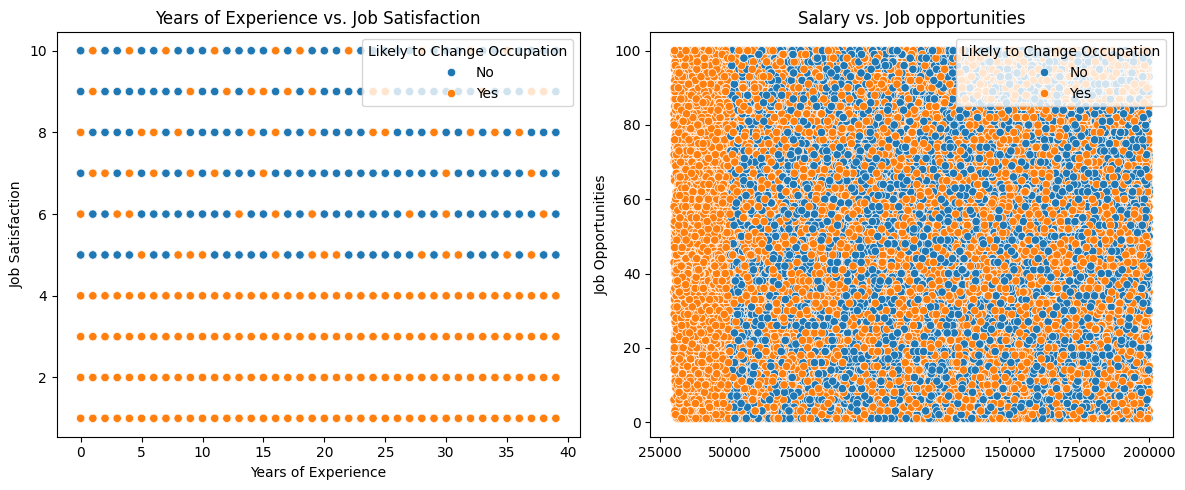

In [15]:
# View the distribution of the target variable
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
x1 = data['Years of Experience']
y1 = data['Job Satisfaction']
x2 = data['Salary']
y2 = data['Job Opportunities']

# Left scatter plot
sns.scatterplot(data=data, x=x1, y=y1, ax=ax[0], hue='Likely to Change Occupation')
ax[0].set_title('Years of Experience vs. Job Satisfaction')

# Right scatter plot
sns.scatterplot(data=data, x=x2, y=y2, ax=ax[1], hue='Likely to Change Occupation')
ax[1].set_title('Salary vs. Job opportunities')

plt.tight_layout()
plt.show()